<a class="anchor" id="0"></a>
# **Decision Tree Classifier Tutorial with Python**

About this file
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

# **1. Введение в Decision Tree алгоритмы** 

Алгоритм дерева решений - один из самых популярных алгоритмов машинного обучения. Он использует древовидную структуру и их возможные комбинации для решения конкретной проблемы. Он принадлежит к классу алгоритмов обучения с учителем, где его можно использовать как для классификации, так и для целей регрессии.

Дерево решений - это структура, которая включает root node, branches и leaf nodes. Каждый root node обозначает проверку атрибута, каждая ветвь обозначает результат проверки, а каждый leaf node содержит метку класса. Самый верхний узел в дереве - это корневой - root node.


Мы делаем некоторые предположения при реализации алгоритма дерева решений. Они перечислены ниже: -

1. Вначале весь обучающий набор рассматривается как корень.
2. Значения характеристик должны быть категориальными. Если значения непрерывны, то они дискретизируются перед построением модели.
3. Записи распределяются рекурсивно на основе значений атрибутов.
4. Порядок размещения атрибутов в качестве корневого или внутреннего узла дерева выполняется с использованием некоторого статистического подхода.


Я опишу терминологию дерева решений в следующем разделе.

# **2. Classification and Regression Trees (CART)**

В настоящее время алгоритм дерева решений известен под своим современным названием **CART**, что означает **деревья классификации и регрессии**. Деревья классификации и регрессии или **CART** - это термин, введенный Лео Брейманом для обозначения алгоритмов дерева решений, которые могут использоваться для задач классификации и регрессионного моделирования.

Алгоритм CART обеспечивает основу для других важных алгоритмов, таких как bagged decision trees, случайный лес и boosted decision trees. В этом ноутбуке я решу проблему классификации. 


# **3. Decision Tree терминология** 

- В алгоритме дерева решений существует древовидная структура, в которой каждый внутренний узел представляет тест для атрибута, каждая ветвь представляет результат теста, а каждый лист представляет метку класса. Пути от корневого узла к конечному узлу представляют собой правила классификации.

- Мы видим, что в алгоритме дерева решений используется некоторая терминология. Термины, используемые в алгоритме дерева решений, следующие:


## **Root Node**

- Он представляет всю генеральную совокупность или выборку. Далее он делится на два или более однородных набора.


## **Splitting**

- Это процесс разделения узла на два или более подузлов.


## Decision Node

- Когда подузел разделяется на другие подузлы, он называется узлом принятия решения.


## Leaf/Terminal Node

- Узлы, которые не разделяются, называются листьями или конечными узлами.


## Pruning

- Когда мы удаляем подузлы узла решения, этот процесс называется сокращением. Это противоположный процесс splitting.


## Branch/Sub-Tree

- Подраздел всего дерева называется ветвью или поддеревом.


## Parent and Child Node

- Узел, который разделен на подузлы, называется родительским узлом, где подузлы являются потомками родительского узла.


Вышеупомянутая терминология четко представлена на следующей диаграмме: 

### Decision-Tree terminology

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

# **4. Логика Decision Tree**


Алгоритм дерева решений - один из наиболее часто и широко используемых алгоритмов машинного обучения с учителем, который можно использовать как для задач классификации, так и для задач регрессии. Интуиция, лежащая в основе алгоритма дерева решений, очень проста для понимания.

Выглядит следующим образом:


1. Для каждого атрибута в наборе данных алгоритм дерева решений формирует узел. Самый важный атрибут помещается в корневой узел.

2. Для оценки поставленной задачи мы начинаем с корневого узла и продвигаемся вниз по дереву, следуя за соответствующим узлом, который соответствует нашему условию или решению.

3. Этот процесс продолжается до тех пор, пока не будет достигнут листовой узел. Он содержит прогноз или результат Дерева решений.

# **5. Меры выбора атрибутов** 

Основная задача в реализации Дерева решений состоит в том, чтобы идентифицировать атрибуты, которые мы рассматриваем как корневой узел и каждый уровень. Этот процесс известен как **выбор атрибутов**. Существуют различные меры выбора атрибутов для идентификации атрибута, который может рассматриваться как корневой узел на каждом уровне.


Есть 2 популярных метода выбора атрибутов. Вот они:


- **Прирост информации**

- **Индекс Джини**


При использовании **прироста информации** в качестве критерия мы предполагаем, что атрибуты являются категориальными, а атрибуты **индекса Джини** считаются непрерывными. Эти меры выбора атрибутов описаны ниже.

## **5.1 Information gain - прирост информации** 

Используя прирост информации в качестве критерия, мы пытаемся оценить информацию, содержащуюся в каждом атрибуте. Чтобы понять концепцию прироста информации, нам нужно знать еще одну концепцию, называемую **энтропия**.

## **Энтропия**

Энтропия измеряет "примеси" в данном наборе данных. В физике и математике энтропия называется случайностью или неопределенностью случайной величины X. В теории информации это относится к шуму в группе примеров. **Прирост информации** - это уменьшение энтропии. Прирост информации вычисляет разницу между энтропией до разделения и средней энтропией после разделения набора данных на основе заданных значений атрибутов.

Энтропия представлена следующей формулой: 


![Entropy](https://habrastorage.org/r/w1560/webt/ey/wa/u-/eywau-ntm5stedcuyrelbhhoipu.png)

Здесь pi – это частотная вероятность элемента/класса i наших данных. Для простоты, предположим, что у нас всего два класса: положительный и отрицательный. Тогда i будет принимать значение либо «+», либо «-». Если бы у нас было в общей сложности 100 точек в нашем наборе данных, 30 из которых принадлежали бы положительному классу, а 70 – отрицательному, тогда p+ было бы равно 3/10, а p- будет 7/10. Тут все просто.

![Entropy](https://habrastorage.org/r/w1560/webt/5_/hh/20/5_hh20bihmp119n_5vzmlq_vuyw.png)

Энтропия составит примерно 0,88. Такое значение считается довольно высоким, то есть у нас высокий уровень энтропии или беспорядка (то есть низкое значение чистоты). Энтропия измеряется в диапазоне от 0 до 1. В зависимости от количества классов в вашем наборе данных значение энтропии может оказаться больше 1, но означать это будет все то же, что уровень беспорядка крайне высок. Для простоты объяснения в сегодняшней статье энтропия у нас будет находиться в пределах от 0 до 1.


Алгоритм дерева решений ID3 (Iterative Dichotomiser) использует энтропию для расчета прироста информации. Таким образом, вычисляя уменьшение **меры энтропии** каждого атрибута, мы можем вычислить их информационный прирост. Атрибут с наибольшим информационным выигрышем выбирается в качестве атрибута разделения в узле.

## **5.2 Gini index** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 


Gini index can be represented with the following diagram:-

## **Индекс Gini **

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


**c** количество классов и **pi** вероятность отнесенеия к классу.

Индекс Джини говорит, что если мы случайным образом выбираем два элемента из совокупности, они должны быть одного класса, и вероятность этого равна 1, если совокупность чистая.

Он работает с категориальной целевой переменной «Успех» или «Неудача». Он выполняет только двоичное разбиение. Чем выше значение Джини, тем выше однородность. CART (Дерево классификации и регрессии) использует метод Джини для создания двоичных разбиений.

Шаги по вычислению Джини для сплита

1. Вычислите Джини для подузлов, используя формулу суммы квадрата вероятности успеха и неудачи (p ^ 2 + q ^ 2).

2. Рассчитайте коэффициент Джини для разделения, используя взвешенный показатель Джини для каждого узла этого разделения.


В случае атрибута с дискретным значением в качестве атрибута разделения выбирается подмножество, которое дает минимальный индекс Джини для выбранного атрибута. В случае атрибутов с непрерывными значениями стратегия заключается в выборе каждой пары смежных значений в качестве возможной точки разделения и точки с меньшим индексом Джини, выбранной в качестве точки разделения. В качестве атрибута разделения выбирается атрибут с минимальным индексом Джини.

# **6. Переобучение и  Decision Tree** 

Переобучение - это практическая проблема при построении модели дерева решений. Проблема переобучения рассматривается, когда алгоритм продолжает идти все глубже и глубже, чтобы уменьшить ошибку обучающего набора, но приводит к увеличению ошибки в тестовом наборе данных. Таким образом, точность прогнозов для нашей модели снижается. Обычно это происходит, когда мы создаем много ветвей из-за выбросов и неточностей в данных.

Чтобы избежать переобучения, можно использовать два подхода:

- Предварительная обрезка - Pre-Pruning

- Пост обрезка - Post-Pruning


## **Pre-Pruning**

В данном случае мы останавливаем строительство дерева немного раньше. Мы предпочитаем не разбивать узел, если его показатель качества ниже порогового значения. Но выбрать подходящую точку остановки сложно.

## **Post-Pruning**

После обрезки мы все глубже и глубже погружаемся в дерево, чтобы построить полное дерево. Если дерево показывает проблему переобучения, то выполняется обрезка. Мы используем данные перекрестной проверки - кроссвалидации, чтобы проверить эффект нашей обрезки. Используя данные перекрестной проверки, мы проверяем, приведет ли расширение узла к улучшению или нет. Если он показывает улучшение, мы можем продолжить, расширив этот узел. Но если он показывает снижение точности, его не следует расширять. Таким образом, узел должен быть преобразован в лист.

# **7. Import libraries** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset**

In [3]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

# **9. Exploratory data analysis** 

In [4]:
# view dimensions of dataset
df.shape

(1728, 7)

In [5]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Переименуем столбцы

Мы видим, что в наборе данных нет правильных имен столбцов. Столбцы просто помечены как 0,1,2 .... и так далее. Мы должны дать столбцам собственные имена. Я сделаю это следующим образом: 

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Частотное распределение значений в переменных

Теперь я проверю количество частот категориальных переменных.

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64
med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64
2        432
5more    432
3        432
4        432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
big      576
small    576
med      576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


Мы видим, что «doors» и «persons» категориальны по своей природе. Итак, я буду рассматривать их как категориальные переменные.

### Summary

- В наборе данных 7 переменных. Все переменные относятся к категориальному типу данных.

- `class` - целевая переменная.


### Исследуем переменную `class` 

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

Целевая переменная `class` по своей природе является порядковой.

### Пропущенные значения

In [11]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Мы видим, что в наборе данных нет пропущенных значений. Ранее я проверял частотное распределение значений. Это также подтверждает, что в наборе данных нет пропущенных значений.

# **10. Объявить вектор признаков и целевую переменную** 

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data в training и test set**

In [13]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **12. Feature Engineering** 

**Feature Engineering** - это процесс преобразования необработанных данных в полезные признаки, которые помогают нам лучше понять нашу модель и повысить ее прогнозирующую способность. Я

Сначала я еще раз проверю типы данных переменных.

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Перекодируем категориальные признаки


In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


Мы видим, что все переменные имеют порядковый категориальный тип данных.

In [20]:
# import category encoders
import category_encoders as ce

In [21]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Теперь у нас есть обучающий и тестовый набор, готовый для построения модели.

# **13. Decision Tree Classifier с критерием индекса gini** 

In [24]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [25]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Предсказываем результаты test выборки с критерием индекса Джини

In [26]:
y_pred_gini = clf_gini.predict(X_test)


### Проверим accuracy score с критерием индекса gini

In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


Здесь **y_test** - истинные метки классов, а **y_pred_gini** - предсказанные метки классов в наборе тестов.

### Сравним train-set и test-set accuracy


Теперь я сравню точность набора train и набора test, чтобы проверить их на переобучение.

In [28]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


### Проверим на переобучение и недообучение

In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Оценка точности обучающего набора составляет 0,7865, а точность набора тестового - 0,8021. Эти два значения вполне сопоставимы. Итак, нет никаких признаков переобучения.

### Визуализируем decision-trees

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(133.92000000000002, 271.8, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(133.92000000000002, 54.360000000000014, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(535.6800000000001, 163.07999999999998, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

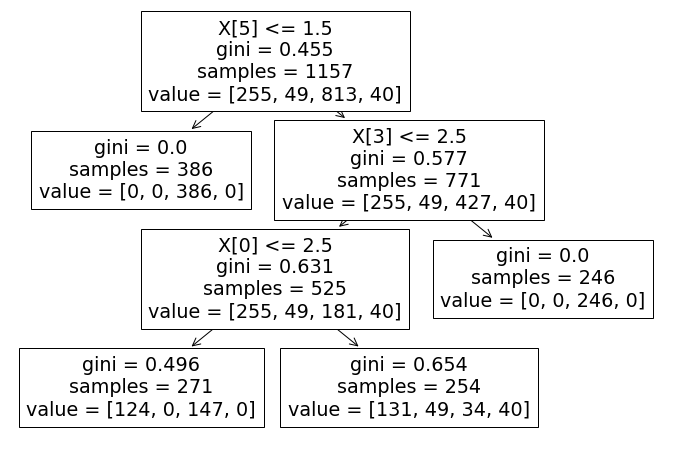

In [31]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# **14. Decision Tree Classifier с критерием энтропии**

In [37]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Предсказать результаты  test выборки с энтропией

In [38]:
y_pred_en = clf_en.predict(X_test)

### Проверим accuracy score с  критерием энтропии

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


### Сравним  train и test accuracy

In [40]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


### Проверка на переобучение

In [42]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


Мы можем увидеть, что оценка учебного набора и оценка тестового набора такие же, как указано выше. Оценка точности обучающего набора составляет 0,7865, а точность набора тестов - 0,8021. Эти два значения вполне сопоставимы. Итак, нет никаких признаков переобучения.

### Визуализируем decision-trees

[Text(267.84000000000003, 380.52, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(133.92000000000002, 271.8, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(401.76000000000005, 271.8, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(267.84000000000003, 163.07999999999998, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(133.92000000000002, 54.360000000000014, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(401.76000000000005, 54.360000000000014, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(535.6800000000001, 163.07999999999998, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

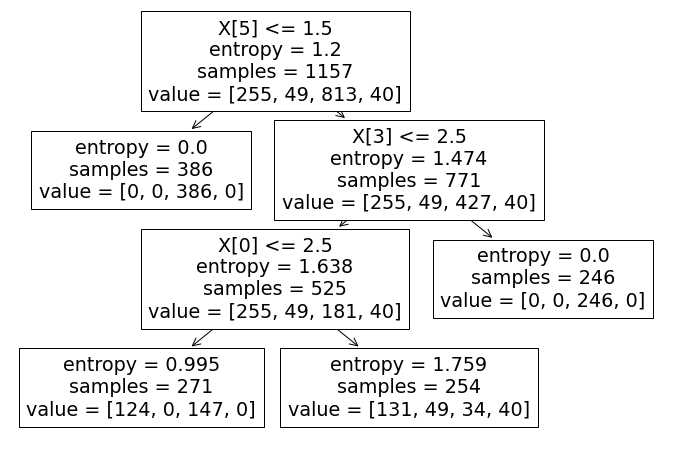

In [43]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

Теперь, основываясь на приведенном выше анализе, мы можем сделать вывод, что точность нашей модели классификации очень хорошая. Наша модель очень хорошо справляется с предсказанием меток классов.

Но она ничего не говорит о типах ошибок, которые делает наш классификатор.

У нас есть еще один инструмент, называемый «confusion matrix», который приходит нам на помощь.

# **15. Confusion matrix** 

Матрица неточностей - это инструмент для суммирования эффективности алгоритма классификации. Матрица неточностей даст нам четкое представление о производительности классификационной модели и о типах ошибок, производимых моделью. Она дает нам сводку правильных и неправильных прогнозов с разбивкой по каждой категории. Резюме представлено в виде таблицы.


При оценке эффективности классификационной модели возможны четыре типа результатов. Эти четыре результата описаны ниже:


**Истинные положительные результаты (TP)** - Истинные положительные результаты возникают, когда мы прогнозируем, что наблюдение принадлежит определенному классу, а наблюдение действительно принадлежит этому классу.


**Истинно-отрицательные (TN)** - Истинно-отрицательные результаты возникают, когда мы прогнозируем, что наблюдение не принадлежит к определенному классу, а наблюдение фактически не принадлежит к этому классу.


**Ложные срабатывания (FP)** - Ложные срабатывания возникают, когда мы прогнозируем, что наблюдение принадлежит определенному классу, но на самом деле наблюдение не принадлежит к этому классу. Этот тип ошибки называется **ошибкой типа I.**



**Ложноотрицательные (FN)** - Ложноотрицательные результаты возникают, когда мы прогнозируем, что наблюдение не принадлежит к определенному классу, но на самом деле наблюдение принадлежит этому классу. Это очень серьезная ошибка, она называется **ошибкой типа II.**


Эти четыре результата суммированы в confusion matrix, приведенной ниже.

In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


# **16. Classification Report** 

** Отчет о классификации ** - это еще один способ оценить производительность модели классификации. Он отображает оценки ** точности **, ** отзыва **, ** f1 ** и ** поддержки ** для модели. Я описал эти термины позже.

Мы можем распечатать отчет о классификации следующим образом: -


**Classification report**это еще один способ оценить производительность модели классификации. Он отображает оценки  **precision**, **recall**, **f1** и **support** для модели. Я описал эти термины позже.

Мы можем распечатать отчет о классификации следующим образом:

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



**Precision** можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а **recall** показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Именно введение precision не позволяет нам записывать все объекты в один класс, так как в этом случае мы получаем рост уровня False Positive. Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.

Как мы отмечали ранее, ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой I-го рода, а второй — ошибкой II-го рода. 

Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок.
Часто в реальной практике стоит задача найти оптимальный (для заказчика) баланс между этими двумя метриками. Классическим примером является задача определения оттока клиентов.
Очевидно, что мы не можем находить всех уходящих в отток клиентов и только их. Но, определив стратегию и ресурс для удержания клиентов, мы можем подобрать нужные пороги по precision и recall. Например, можно сосредоточиться на удержании только высокодоходных клиентов или тех, кто уйдет с большей вероятностью, так как мы ограничены в ресурсах колл-центра.

Обычно при оптимизации гиперпараметров алгоритма (например, в случае перебора по сетке GridSearchCV ) используется одна метрика, улучшение которой мы и ожидаем увидеть на тестовой выборке.
Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall :

$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$


$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)
F-мера достигает максимума при полноте и точности, равными единице, и близка к нулю, если один из аргументов близок к нулю.
В sklearn есть удобная функция _metrics.classificationreport, возвращающая recall, precision и F-меру для каждого из классов, а также количество экземпляров каждого класса.


# **17. Результаты и выводы** 

1. В этом проекте я построил модель классификатора дерева решений для прогнозирования безопасности автомобиля. Я строю две модели: одну с критерием «индекс Джини», а другую - с критерием «энтропия». Модель дает очень хорошие характеристики, о чем свидетельствует точность модели в обоих случаях, которая составила 0,8021.
2. В модели с критерием «индекс Джини» оценка точности обучающего набора составляет 0,7865, а точность тестового набора - 0,8021. Эти два значения вполне сопоставимы. Итак, нет никаких признаков переобучения.
3. Точно так же в модели с критерием «энтропия» оценка точности обучающего набора составляет 0,7865, а точность тестового набора - 0,8021. Мы получаем те же значения, что и в случае с критерием «gini». Итак, нет никаких признаков переобучения.
4. В обоих случаях оценка точности обучающего набора и набора тестов одинакова. Это может произойти из-за небольшого набора данных.
5. Матрица неточностей и отчет о классификации дают очень хорошие характеристики модели.